In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import math
from statsmodels.tsa.stattools import adfuller

In [2]:
icici = pdr.DataReader('ICICIBANK.BO', data_source='yahoo', start='2015-10-23', end='2019-12-30')

In [3]:
icici.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-23,262.726990,259.000000,259.091003,260.135986,389855.0,245.185211
2015-10-26,263.364014,258.000000,261.817993,259.273010,336472.0,244.371811
2015-10-27,259.908997,256.635986,258.817993,257.908997,236226.0,243.086166
2015-10-28,254.727005,244.863998,254.544998,246.817993,823599.0,232.632614
2015-10-29,249.272995,245.727005,248.091003,246.772995,410657.0,232.590195


In [4]:
icici.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1027 entries, 2015-10-23 to 2019-12-30
Data columns (total 6 columns):
High         1027 non-null float64
Low          1027 non-null float64
Open         1027 non-null float64
Close        1027 non-null float64
Volume       1027 non-null float64
Adj Close    1027 non-null float64
dtypes: float64(6)
memory usage: 56.2 KB


In [5]:
plt.style.use('classic')

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


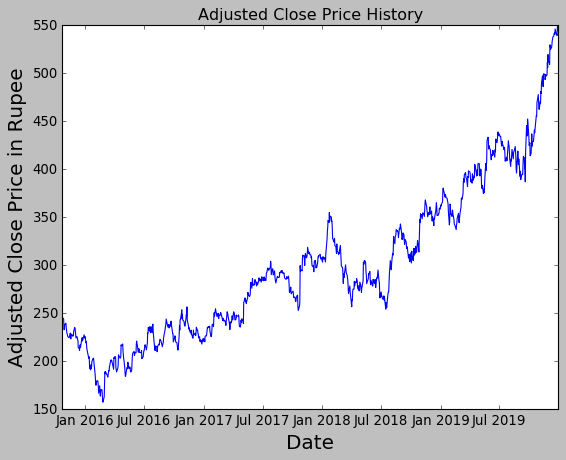

<Figure size 1600x800 with 0 Axes>

In [6]:
# visualize the adj. closing price history
plt.title('Adjusted Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price in Rupee', fontsize=18)
plt.plot(icici['Adj Close'])
plt.figure(figsize=(20,10))
plt.show()

In [7]:
#ARIMA is divided into AR, I, MA and we need to pass p,q,d
#values corresponding to these terms.
#so to find these values we need to construct acf and pacf
#graphs and check for stationarity


In [8]:
data = icici.filter(['Adj Close'])


In [9]:
data.head()

,Adj Close
Date,
2015-10-23,245.185211
2015-10-26,244.371811
2015-10-27,243.086166
2015-10-28,232.632614
2015-10-29,232.590195


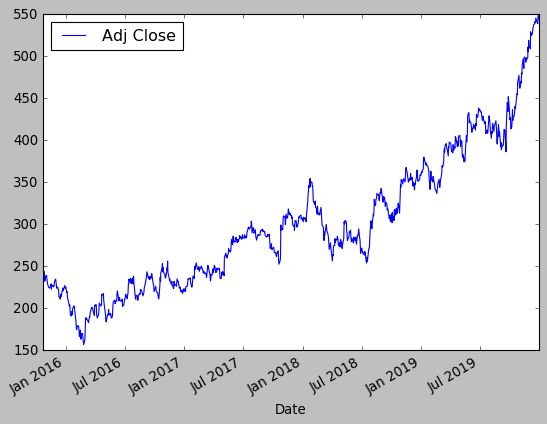

In [10]:
data.plot()

<Figure size 640x480 with 0 Axes>

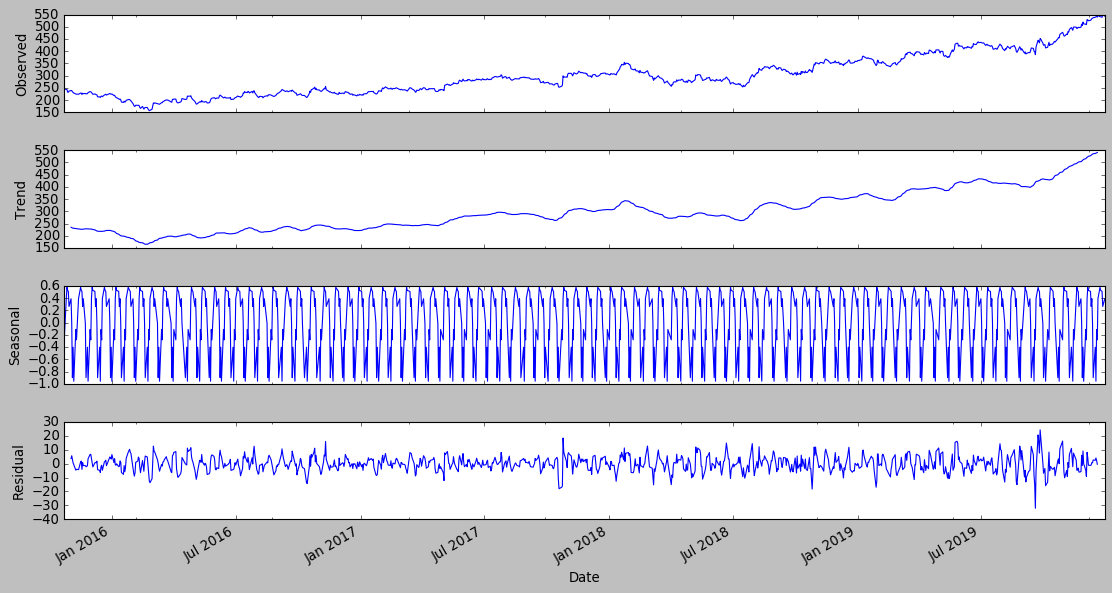

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Adj Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [12]:
#ETS trend was plotted above, it tells us about the trend and seasonality

In [13]:
#now we need to check for stationarity, and we use the Augmented Dickey Fuller Test to do so

In [14]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_check(data['Adj Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.8005769340457406
p-value : 0.9916454751160747
#Lags Used : 0
Number of Observations Used : 1026
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
data['First Difference'] = data['Adj Close'] - data['Adj Close'].shift(1)

In [17]:
adf_check(data['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -32.785028940341704
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1025
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


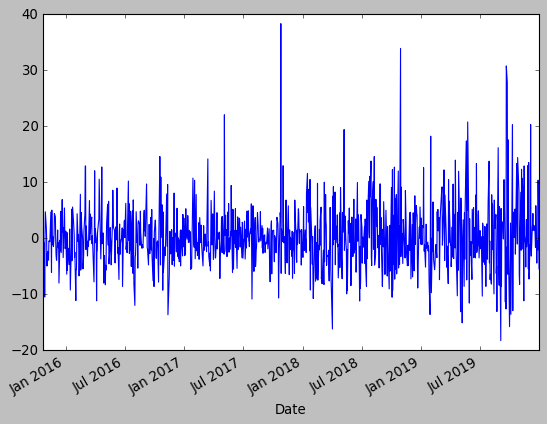

In [18]:
data['First Difference'].plot()

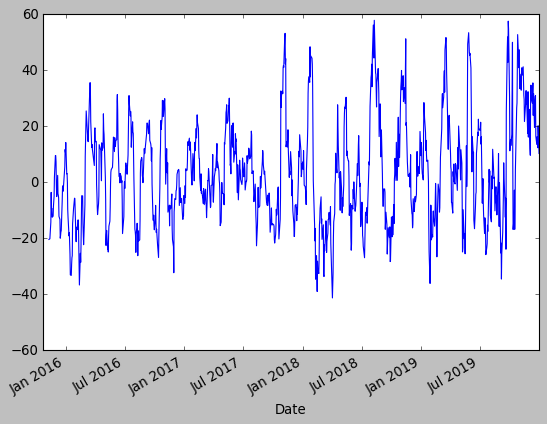

In [19]:
# You can also do seasonal first difference
data['Seasonal First Difference'] = data['Adj Close'] - data['Adj Close'].shift(12)
data['Seasonal First Difference'].plot()

In [20]:
adf_check(data['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.363935307580812
p-value : 9.342966037645635e-11
#Lags Used : 22
Number of Observations Used : 992
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
data.head(20)

,Adj Close,First Difference,Seasonal First Difference
Date,,,
2015-10-23,245.185211,NaN,NaN
2015-10-26,244.371811,-0.813400,NaN
2015-10-27,243.086166,-1.285645,NaN
2015-10-28,232.632614,-10.453552,NaN
2015-10-29,232.590195,-0.042419,NaN
2015-10-30,237.345230,4.755035,NaN
2015-11-02,239.316071,1.970840,NaN
2015-11-03,239.187897,-0.128174,NaN
2015-11-04,234.260376,-4.927521,NaN


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot


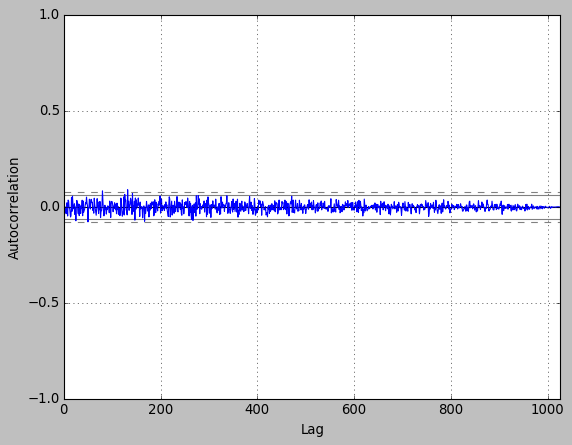

In [79]:
autocorrelation_plot(data['First Difference'].dropna())

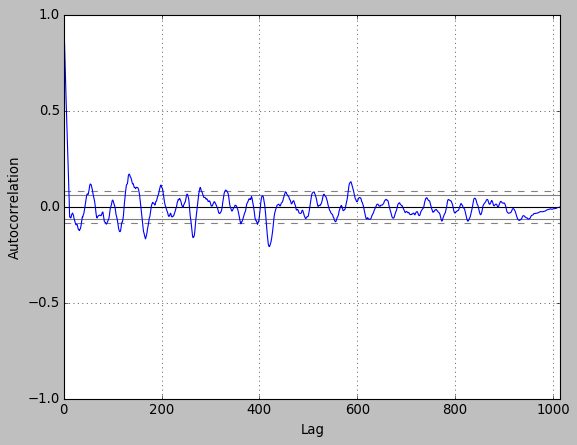

In [80]:
autocorrelation_plot(data['Seasonal First Difference'].dropna())

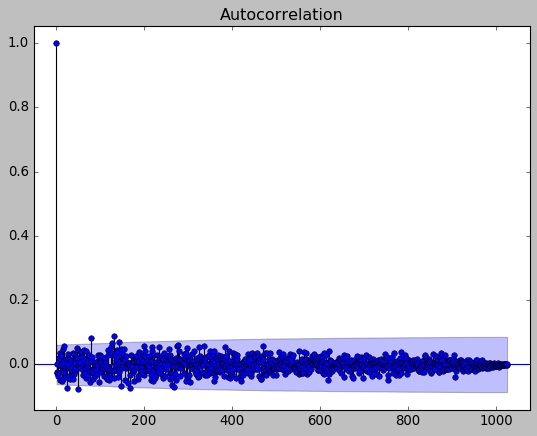

In [81]:
fig_seasonal_first = plot_acf(data["First Difference"].dropna())

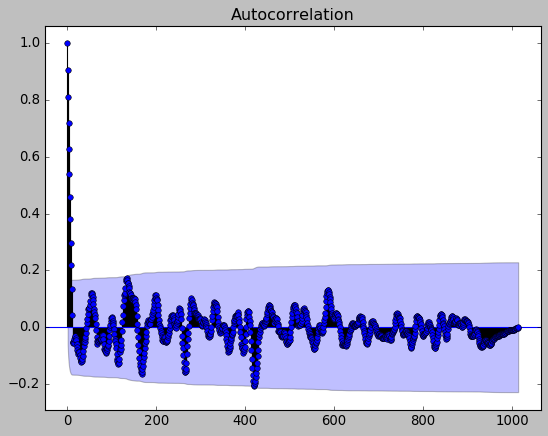

In [82]:
fig_seasonal_first = plot_acf(data["Seasonal First Difference"].dropna())

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


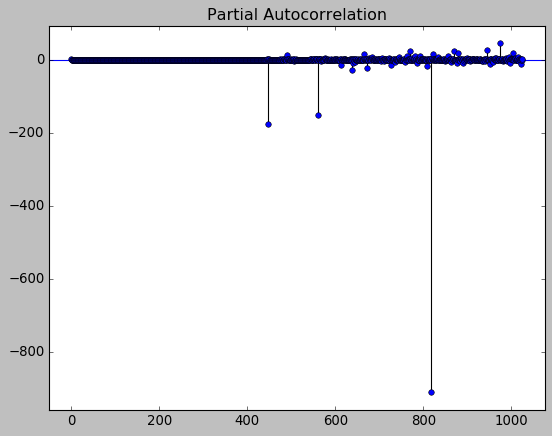

In [83]:
result = plot_pacf(data["First Difference"].dropna())

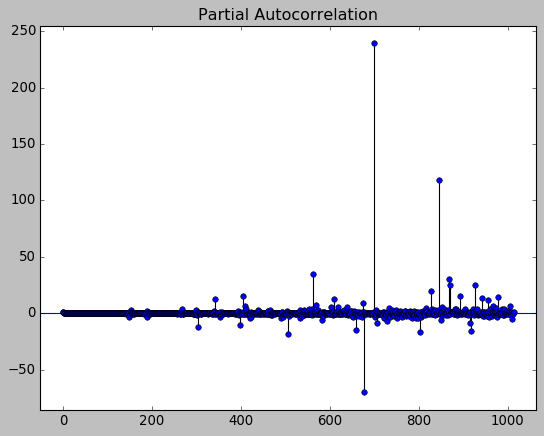

In [84]:
result = plot_pacf(data["Seasonal First Difference"].dropna())

Text(0.5, 1.0, 'ICICI Autocorrelation plot')

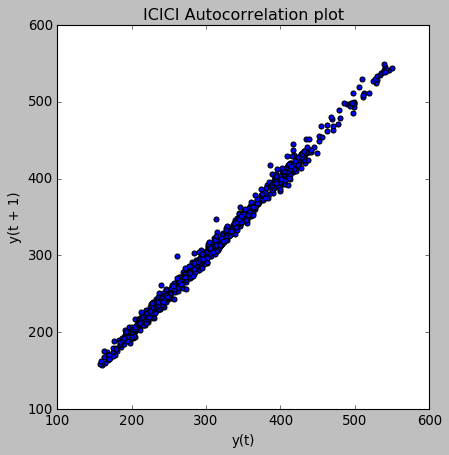

In [85]:
plt.figure(figsize=(6,6))
lag_plot(data['Adj Close'], lag=1)
plt.title('ICICI Autocorrelation plot')

Text(0.5, 1.0, 'ICICI Autocorrelation plot')

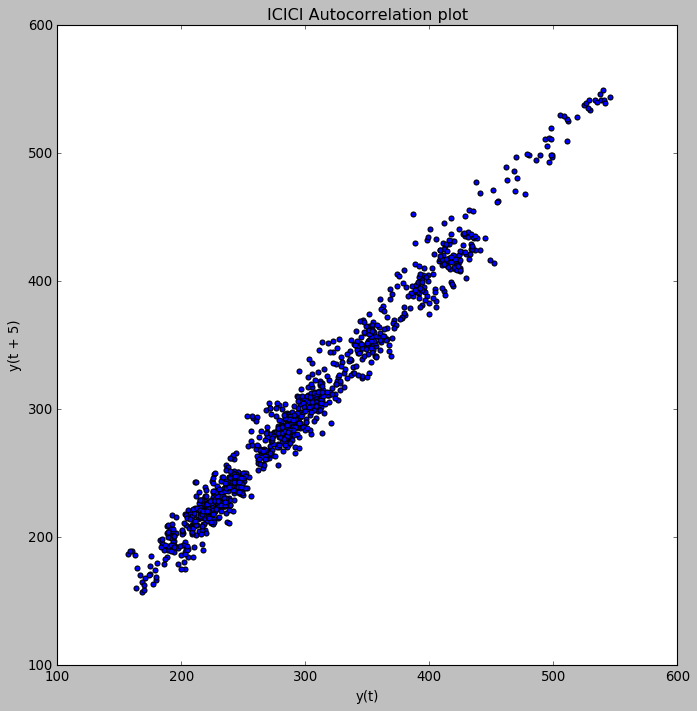

In [23]:
plt.figure(figsize=(10,10))
lag_plot(data['Adj Close'], lag=5)
plt.title('ICICI Autocorrelation plot')

In [24]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    
    return error

In [25]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [26]:
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)

In [27]:
data.head(20)

,Adj Close,First Difference,Seasonal First Difference
Date,,,
2015-10-23,245.185211,NaN,NaN
2015-10-26,244.371811,-0.813400,NaN
2015-10-27,243.086166,-1.285645,NaN
2015-10-28,232.632614,-10.453552,NaN
2015-10-29,232.590195,-0.042419,NaN
2015-10-30,237.345230,4.755035,NaN
2015-11-02,239.316071,1.970840,NaN
2015-11-03,239.187897,-0.128174,NaN
2015-11-04,234.260376,-4.927521,NaN


In [25]:
evaluate_models(data['Adj Close'],p_values,d_values,q_values)

ARIMA(0, 0, 0) MSE=30349.187
ARIMA(0, 0, 1) MSE=8182.319


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) MSE=77.683
ARIMA(0, 1, 1) MSE=77.918
ARIMA(0, 1, 2) MSE=77.970
ARIMA(0, 1, 3) MSE=78.220
ARIMA(0, 1, 4) MSE=78.622
ARIMA(0, 2, 0) MSE=165.262
ARIMA(0, 2, 1) MSE=77.132


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered

ARIMA(1, 0, 0) MSE=78.760


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered

ARIMA(1, 1, 0) MSE=77.934


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow enco

ARIMA(1, 2, 0) MSE=128.649


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy

ARIMA(1, 2, 1) MSE=77.342


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:

ARIMA(2, 1, 0) MSE=77.977


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1) MSE=79.315


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered

ARIMA(2, 2, 0) MSE=110.611
ARIMA(2, 2, 1) MSE=77.346


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-

ARIMA(3, 1, 0) MSE=78.236


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/ho

ARIMA(3, 2, 0) MSE=101.515


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.

ARIMA(4, 1, 0) MSE=78.633
ARIMA(4, 1, 1) MSE=78.631


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered

ARIMA(4, 2, 0) MSE=101.980


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1) MSE=77.938


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered

Best ARIMA(0, 2, 1) MSE=77.132


In [28]:
df = data

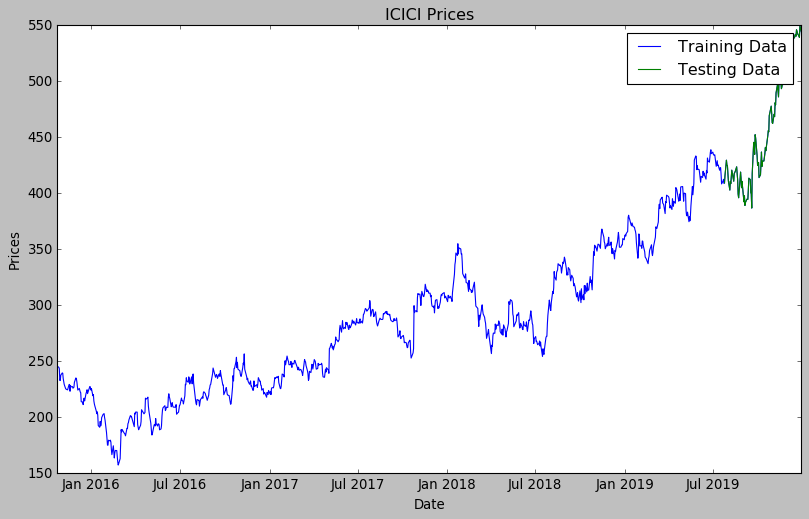

In [29]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(12,7))
plt.title('ICICI Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
# plt.xticks(np.arange(0,924, 206), df['Date'][0:924:206])
plt.legend()

In [30]:
len(train_data)

924

In [31]:
len(test_data)

103

In [112]:
train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    print(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Root Mean Squared Error: %.3f' % error)
# rmse = math.sqrt(mean_squared_error(y_test,predictions))
# prit("RMSE is ",rmse)

<class 'list'>
(array([409.02630469]), array([5.22568984]), array([[398.78414081, 419.26846856]]))
(array([409.52261474]), array([5.22288808]), array([[399.2859422 , 419.75928729]]))
(array([415.99271534]), array([5.22365716]), array([[405.75453544, 426.23089524]]))
(array([429.84294864]), array([5.23903212]), array([[419.57463437, 440.11126292]]))
(array([425.49215886]), array([5.23867609]), array([[415.2245424 , 435.75977532]]))
(array([425.03441906]), array([5.23594835]), array([[414.77214888, 435.29668924]]))
(array([417.65852769]), array([5.23951718]), array([[407.38926271, 427.92779267]]))
(array([411.22801113]), array([5.24160908]), array([[400.95464612, 421.50137614]]))
(array([403.04360145]), array([5.24642649]), array([[392.76079447, 413.32640842]]))
(array([410.85949199]), array([5.24911067]), array([[400.57142412, 421.14755985]]))
(array([408.85954069]), array([5.2469278]), array([[398.57575118, 419.14333021]]))
(array([415.07620954]), array([5.24744904]), array([[404.79139

(array([546.71350946]), array([5.68123151]), array([[535.57850032, 557.84851861]]))
(array([542.30407342]), array([5.6808328]), array([[531.16984572, 553.43830111]]))
(array([541.89633644]), array([5.67818669]), array([[530.76729503, 553.02537785]]))
(array([539.83772687]), array([5.67612971]), array([[528.71271707, 550.96273667]]))
(array([550.26402552]), array([5.6811956]), array([[539.12908676, 561.39896428]]))
Testing Root Mean Squared Error: 77.132


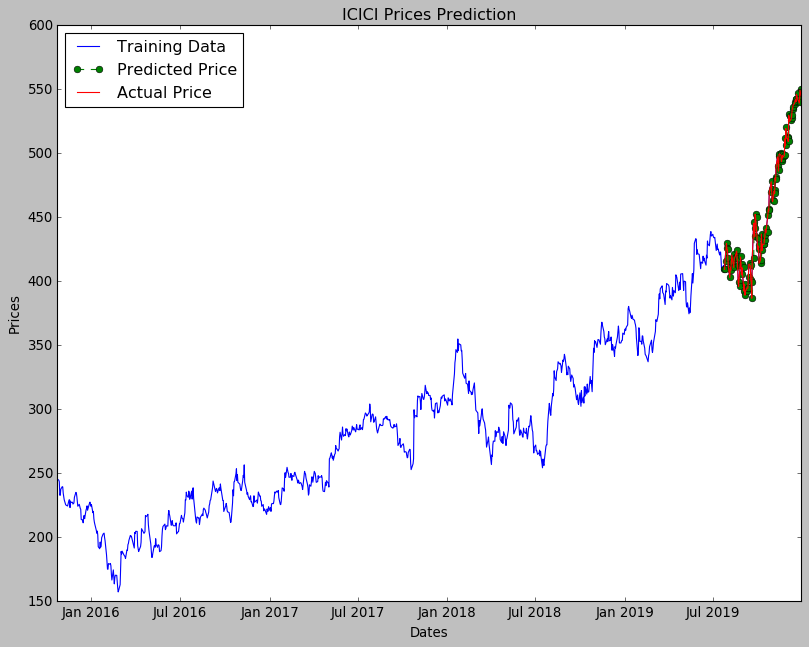

In [81]:
plt.figure(figsize=(12,9))
plt.plot(df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('ICICI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend(loc='upper left')

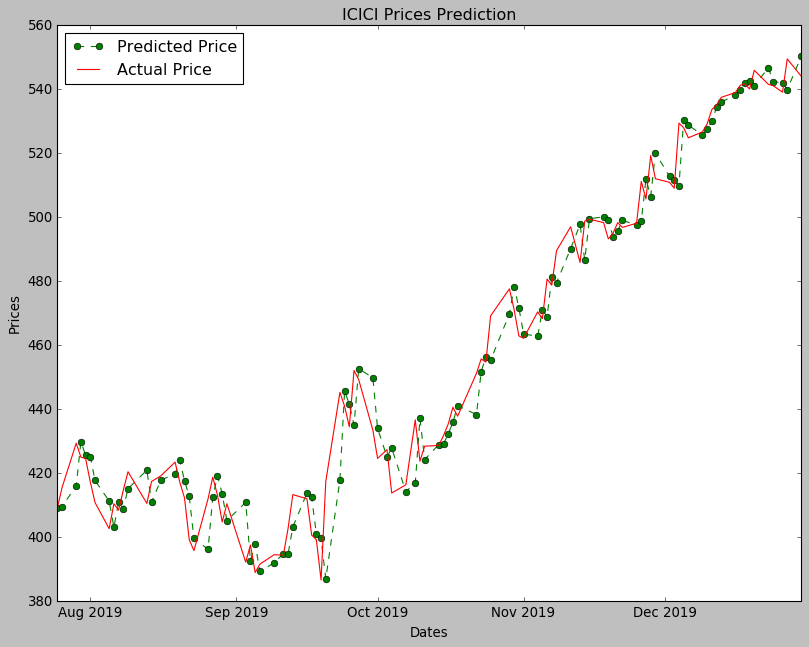

In [82]:
plt.figure(figsize=(12,9))
# plt.plot(df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('ICICI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend(loc='upper left')

In [131]:
rmse = math.sqrt(error)
rmse

8.782491716351128